# <center>Perceptrón multicapa</center>

Es un tipo de red neuronal en donde hay varias capas:
- Capa de entrada
- Capas ocultas
- Capa de salida

![Perceptron multicapa](img/multilayer_perceptron.png)

En el perceptrón multicapa, las neuronas de la capa 1 se conectan con las neuronas de la capa 2, las neuronas de la capa 2 con las neuronas de la capa 3 y así sucesivamente. No está permitido conectar neuronas de la capa 1 con las neuronas de la capa 4 por ejemplo, ese salto podrá suceder en otro tipo de redes neuronales pero no en el perceptrón multicapa.

El perceptrón multicapa permite resolver problemas que no son linealmente separables.

## Los pesos y cómo nombrarlos

En el siguiente gráfico se dibujan algunos pesos y, como se podrá dilucidar, el número de estos pesos crece rápidamente a medida que se agregan capas y neuronas.

![Pesos perceptrón multicapa](https://s20.postimg.org/ouyn8o7wd/weights_multilayer_perceptron.png)

Por ello, para no perdernos, al nombrar los pesos usamos la siguiente notación:

![Notación de los pesos](https://s20.postimg.org/3lb0xzjxp/weights_notation.png)

- **Capa de donde sale la conexión**: las capas se enumeran de derecha a izquierda según la imagen de arriba, siendo 1 la capa de entrada.
- **Neurona inicial**: de donde parte la conexión. Las neuronas las numeramos de arriba a abajo, siendo 1 la superior.
- **Neurona final**: a donde llega la conexión.

## Limitaciones del perceptrón multicapa

- El Perceptrón Multicapa no extrapola bien, es decir, si la red se entrena mal o de manera insuficiente, las salidas pueden ser imprecisas.
- La existencia de mínimos locales en la función de error dificulta considerablemente el entrenamiento, pues una vez alcanzado un mínimo el entrenamiento se detiene aunque no se haya alcanzado la tasa de convergencia fijada.

Cuando caemos en un mínimo local sin satisfacer el porcentaje de error permitido se puede considerar: cambiar la topología de la red (número de capas y número de neuronas), comenzar el entrenamiento con unos pesos iniciales diferentes, modificar los parámetros de aprendizaje, modificar el conjunto de entrenamiento o presentar los patrones en otro orden.


## La función sigmoide
En el [capítulo anterior](https://github.com/mondeja/fullstack/tree/master/backend/src/analisis_de_datos/machine_learning/redes_neuronales/002-perceptron.ipynb) vimos como la función de activación $\phi(z)$ producía un salto unitario entre los valores 0 y 1. Así se activaba o no la neurona, dependiendo de si los valores procesados con sus pesos superaban o no el umbral. 

Sin embargo, se produce un comportamiento más realista en el aprendizaje de las neuronas cuando esta función toma la forma de una [función sigmoide](https://es.wikipedia.org/wiki/Funci%C3%B3n_sigmoide):
$$y = \frac{1}{1 + e^{-x}}$$

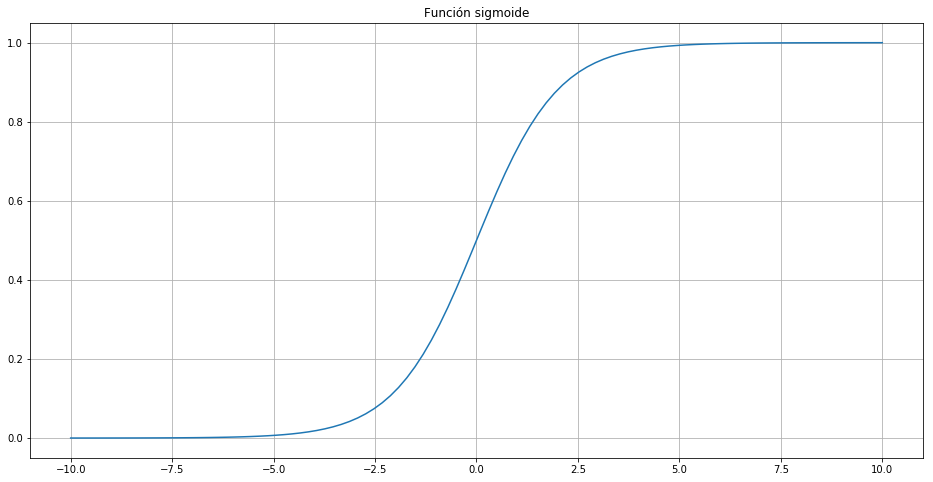

In [4]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: 1 / (1 + np.exp(-x))  # Función sigmoide

x = np.linspace(-10, 10, num=100) # Eje de X

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(x, f(x))

plt.title("Función sigmoide")
plt.grid()
plt.show()

In [41]:
from decimal import Decimal

x = -25
n_iteraciones = 50

for _ in range(n_iteraciones):
    y = f(x)
    # Para mayor precisión descomentar:
    #y = Decimal(y)
    print("x=%d\ty=%r" % (x, y))
    x += 1

x=-25	y=1.3887943864771165e-11
x=-24	y=3.775134544136586e-11
x=-23	y=1.0261879630648841e-10
x=-22	y=2.789468092090815e-10
x=-21	y=7.582560422162393e-10
x=-20	y=2.061153618190206e-09
x=-19	y=5.6027964061459456e-09
x=-18	y=1.5229979512760363e-08
x=-17	y=4.1399375473943345e-08
x=-16	y=1.1253516205509509e-07
x=-15	y=3.05902226925625e-07
x=-14	y=8.315280276641327e-07
x=-13	y=2.260324297903576e-06
x=-12	y=6.1441746022147215e-06
x=-11	y=1.670142184809519e-05
x=-10	y=4.539786870243442e-05
x=-9	y=0.0001233945759862318
x=-8	y=0.00033535013046647827
x=-7	y=0.0009110511944006456
x=-6	y=0.002472623156634775
x=-5	y=0.006692850924284857
x=-4	y=0.017986209962091562
x=-3	y=0.04742587317756679
x=-2	y=0.11920292202211757
x=-1	y=0.2689414213699951
x=0	y=0.5
x=1	y=0.7310585786300049
x=2	y=0.8807970779778823
x=3	y=0.9525741268224331
x=4	y=0.9820137900379085
x=5	y=0.9933071490757153
x=6	y=0.9975273768433653
x=7	y=0.9990889488055994
x=8	y=0.9996646498695336
x=9	y=0.9998766054240137
x=10	y=0.9999546021312976
x

Como podemos comprobar en la representación numérica, la función posee dos [asíntotas](https://es.wikipedia.org/wiki/As%C3%ADntota) horizontales en los valores 1 y 0. 

> La función sigmoidal es característica de muchos procesos de aprendizaje y fenómenos físicos.

_____________________

## Algoritmo de propagación hacia atrás
Es un algoritmo de aprendizaje supervisado que se usa para entrenar redes neuronales artificiales. El algoritmo emplea un ciclo propagación – adaptación de dos fases. Una vez que se ha aplicado un patrón a la entrada de la red como estímulo, este se propaga desde la primera capa a través de las capas siguientes de la red, hasta generar una salida. La señal de salida se compara con la salida deseada y se calcula una señal de error para cada una de las salidas.

Las salidas de error se propagan hacia atrás, partiendo de la capa de salida, hacia todas las neuronas de la capa oculta que contribuyen directamente a la salida. Sin embargo las neuronas de la capa oculta solo reciben una fracción de la señal total del error, basándose aproximadamente en la contribución relativa que haya aportado cada neurona a la salida original. Este proceso se repite, capa por capa, hasta que todas las neuronas de la red hayan recibido una señal de error que describa su contribución relativa al error total.



__________________________

## Implementación tabla de verdad XOR

#### <center>[Visualización de comportamiento de un perceptrón multicapa aprendiendo la tabla XOR](http://www.emergentmind.com/neural-network)</center>

En el [capítulo anterior](http://nbviewer.jupyter.org/github/mondeja/fullstack/blob/master/backend/src/analisis_de_datos/machine_learning/redes_neuronales/002-perceptron.ipynb#Limitaciones-del-perceptr%C3%B3n) vimos como un perceptrón simple no es capaz de aprender la tabla de la disyunción exclusiva, pero con el perceptrón multicapa sí seremos capaces.

|  *XOR*  | True     |   False   |
|---------|----------|-----------|
|**True** | False    | True      |
|**False**| True     | False     |


Esta vez vamos a crear una pequeña red neuronal con dos entradas, una capa oculta con 3 neuronas y una salida. La implementación será pura programación funcional usando `numpy`, sin objetos. La red neuronal estará codificada en las matrices de los pesos.

In [1]:
import numpy as np

n_iteraciones = 6000

# Tamaños de cada capa en la red
t_capa_entrada, t_capa_oculta, t_capa_salida = 2, 3, 1

X = np.array(      # Tabla de verdad XOR:
   [[0, 0],    # Falso - Falso         -> Falso
    [0, 1],    # Falso - Verdadero     -> Verdadero
    [1, 0],    # Verdadero - Falso     -> Verdadero
    [1, 1]]    # Verdadero - Verdadero -> Falso
)
Y = np.array([ [0],   [1],   [1],   [0]])  # Valores objetivo

sigmoide = lambda x: 1/(1 + np.exp(-x))  # Función sigmoide
sigmoide_der = lambda x: x * (1 - x)     # Derivada de la función sigmoide

Para representar los pesos de de entrada para cada capa usamos matrices con la notación descrita arriba. Aquí podemos ver las matrices que representan los pesos en las conexiones de las neuronas:

$$\pmb{w}_{oculta} = \begin{bmatrix}w^1_{1, 1} & w^1_{1, 2} & w^1_{1, 3} \\ w^1_{2, 1} & w^1_{2, 2} & w^1_{2, 3} \end{bmatrix}, \pmb{w}_{salida} =  \begin{bmatrix}w^2_{1, 1} \\ w^2_{2, 1} \\ w^2_{3, 1} \end{bmatrix}$$

In [2]:
# Pesos de las capas
W_oculta = np.random.uniform(size=(t_capa_entrada, t_capa_oculta))  # Capa oculta
W_salida = np.random.uniform(size=(t_capa_oculta, t_capa_salida))   # Capa de salida

for i in range(n_iteraciones):
    capa_oculta = sigmoide(np.dot(X, W_oculta))            # Resultados de la capa oculta
    salida = sigmoide(np.dot(capa_oculta, W_salida))       # Resultados de la capa de salida
    error = Y - salida                                     # Error
     
    delta_salida = error * sigmoide_der(salida)
    delta_oculta = delta_salida.dot(W_salida.T) * sigmoide_der(capa_oculta)
    W_salida += capa_oculta.T.dot(delta_salida)
    W_oculta += X.T.dot(delta_oculta)
 
print(salida)

[[0.04223424]
 [0.97409124]
 [0.97409555]
 [0.00953029]]


> Si has seguidos todos los capítulos, llegado a este punto puedes observar como hay diferentes formas de implementar una red neuronal programáticamente. Para dominar el machine learning hay que conocer los algoritmos y saber implementarlos sin importar tanto que tecnología estás usando.

__________________

### <center>Capítulo anterior: [**El perceptrón**](http://nbviewer.jupyter.org/github/mondeja/fullstack/blob/master/backend/src/analisis_de_datos/machine_learning/redes_neuronales/002-perceptron.ipynb) <center>
### <center>Siguiente capítulo: [**Implementación de un perceptrón multicapa - Piedra, papel, tijeras**](http://nbviewer.jupyter.org/github/mondeja/fullstack/blob/master/backend/src/analisis_de_datos/machine_learning/redes_neuronales/004-mp_rps.ipynb) <center>
    
__________________

> Fuentes:
- [Redes Neuronales parte 1 - Rafael Alberto Moreno Parra](https://openlibra.com/es/book/redes-neuronales-parte-1)
- https://sinfallas.wordpress.com/2017/11/14/el-perceptron-y-perceptron-multicapa-que-es-y-con-que-se-come/
- http://python3.codes/neural-network-python-part-1-sigmoid-function-gradient-descent-backpropagation/
- https://es.wikipedia.org/wiki/Propagaci%C3%B3n_hacia_atr%C3%A1s